## 1. 파이썬을 활용한 기초 데이터 처리

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# (1) 데이터 수집
data = load_breast_cancer()

# (2) 2차원 배열 객체 만들기
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# (3) 해당 데이터를 pandas 혹은 numpy의 통계 계산 방법을 통해 기초 통계 작업 수행
print('종양의 평균 면적:', df['mean area'].mean())
print('종양의 둘레 평균:', df['mean perimeter'].mean())
print('양성인 사람 수:', df['target'].value_counts()[1])

종양의 평균 면적: 654.8891036906855
종양의 둘레 평균: 91.96903339191564
양성인 사람 수: 357


## 2. 머신러닝 필수 라이브러리를 활용한 기초 머신러닝 및 시각화 수행

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# (1) k-NN 알고리즘을 활용하여 머신러닝 수행
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target.reshape(-1,1), test_size=0.2)

model = dict()
acc = dict()
for k in [2,3,4]:
    model[k] = KNeighborsClassifier(k)
    model[k].fit(x_train, y_train)
    preds = model[k].predict(x_test)
    acc[k] = accuracy_score(y_test, preds)
    print(f'Accuracy with K={k}:', acc[k])

Accuracy with K=2: 0.9298245614035088
Accuracy with K=3: 0.9473684210526315
Accuracy with K=4: 0.9473684210526315


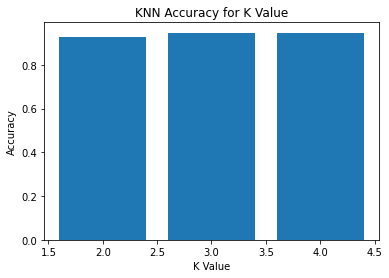

In [4]:
import matplotlib.pyplot as plt

# (2) matplotlib에서 제공하는 함수를 활용하여 시각화 수행
plt.bar(x=acc.keys(), height=acc.values())
plt.title('KNN Accuracy for K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

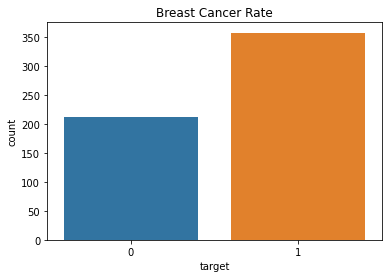

In [5]:
import seaborn as sns

# (3) seaborn에서 제공하는 함수를 활용하여 시각화 수행
sns.countplot(data=df, x='target')
plt.title('Breast Cancer Rate')
plt.show()